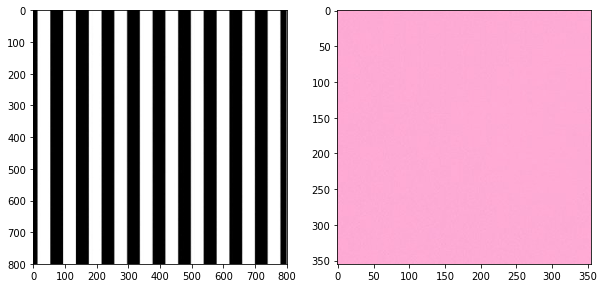

In [11]:
import numpy as np
import matplotlib.pyplot as plt 
import cv2

%matplotlib inline 

# قراءة الصورة 
image_stripes = cv2.imread('images/stripes.jpg')

# RGB تغيير الألوان إلى 
image_stripes = cv2.cvtColor(image_stripes, cv2.COLOR_BGR2RGB)

# قراءة الصورة 
image_solid = cv2.imread('images/pink_solid.jpg')

# RGB تغيير الألوان إلى 
image_solid = cv2.cvtColor(image_solid, cv2.COLOR_BGR2RGB)

# إضهار الصورة

f, (ax1,ax2) = plt.subplots(1, 2, figsize=(10,5))

ax1.imshow(image_stripes)
ax2.imshow(image_solid)

In [14]:
# تحويل الصورة إلى التدريج الرمادي من أجل أن نركز على حدة الألوان فقط

gray_stripes = cv2.cvtColor(image_stripes , cv2.COLOR_RGB2GRAY)
gray_solid = cv2.cvtColor(image_solid , cv2.COLOR_RGB2GRAY)

# تسوية قيم اللألوان في الصورة من النطاق [255:0] إلى النطاق 0 و ا 

norm_stripes = gray_stripes/255.0
norm_solid = gray_solid/255.0

# تادية نحويل فوريور
def ft_image(norm_image):
    f = np.fft.fft2(norm_image)
    fshift = np.fft.fftshift(f)
    frequency_tx = 20*np.log(np.abs(fshift))\
    
    return frequency_tx


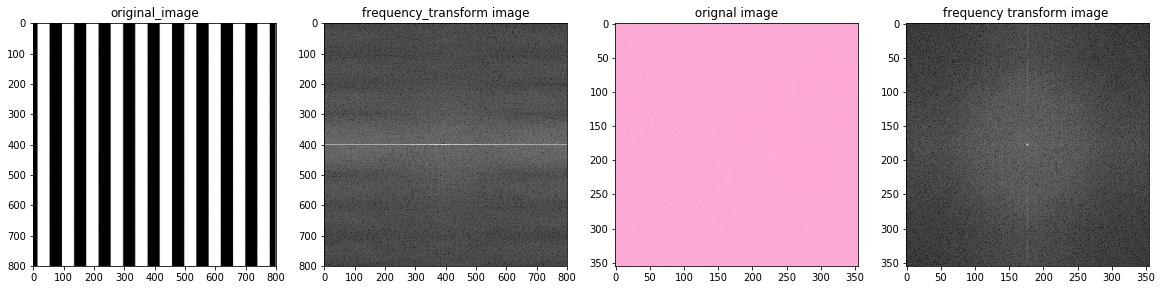

In [15]:
# نقوم بمناداة الدالة 

f_stripes = ft_image(norm_stripes)
f_solid = ft_image(norm_solid)

# إظهار الصورة 

f, (ax1 , ax2 ,ax3 ,ax4)= plt.subplots(1,4,figsize=(20,10))

ax1.set_title('original_image')
ax1.imshow(image_stripes)
ax2.set_title('frequency_transform image')
ax2.imshow(f_stripes , cmap='gray')
ax3.set_title(' orignal image ')
ax3.imshow(image_solid)
ax4.set_title('frequency transform image ')
ax4.imshow(f_solid , cmap='gray')

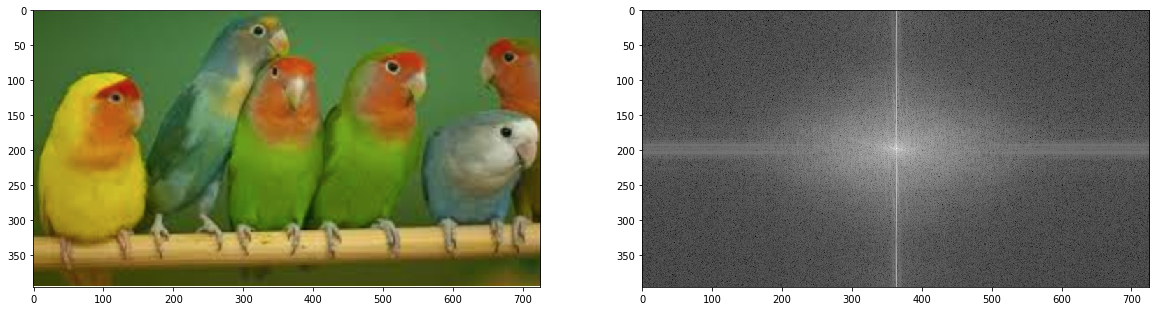

In [18]:
image = cv2.imread('images/birds.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image , cv2.COLOR_RGB2GRAY)
norm_image = gray/255.0
f_image = ft_image(norm_image)
f, (ax1 ,ax2) = plt.subplots(1,2,figsize=(20,10))

ax1.imshow(image)
ax2.imshow(f_image,cmap='gray')

# إنشاء فلتر و إيجاد الحواف

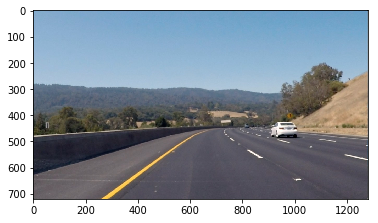

In [21]:
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import cv2 
import numpy as np

%matplotlib inline 

# إظهار الصورة 

image = mpimg.imread('images/curved_lane.jpg')
plt.imshow(image)

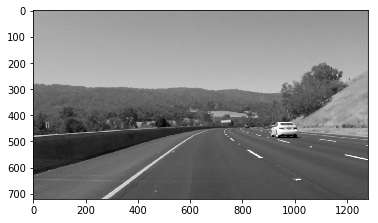

In [22]:
#  تحويل الصورة إلى الرمادي 
gray = cv2.cvtColor(image , cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap='gray')

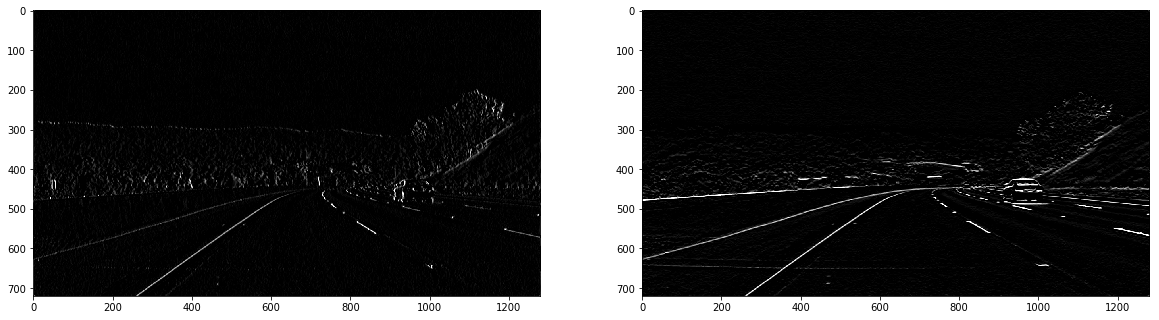

In [26]:
# تعيين كاشف سوبل

sobel_x = np.array([[-1,0,1 ],
                   [-2,0,2 ],
                   [-1,0,1 ]])
sobel_y = np.array([[-1,-2,-1],
                   [0,0,0],
                   [1,2,1]])

# filter2D ترشيح الصورة بإستخدام 

x_filtered_image =cv2.filter2D( gray , -1 , sobel_x)
y_filtered_image =cv2.filter2D( gray , -1 , sobel_y)

# إضهار الصورة

f, (ax1 ,ax2) = plt.subplots(1,2,figsize=(20,10))
ax1.imshow(x_filtered_image , cmap='gray')
ax2.imshow(y_filtered_image , cmap='gray')

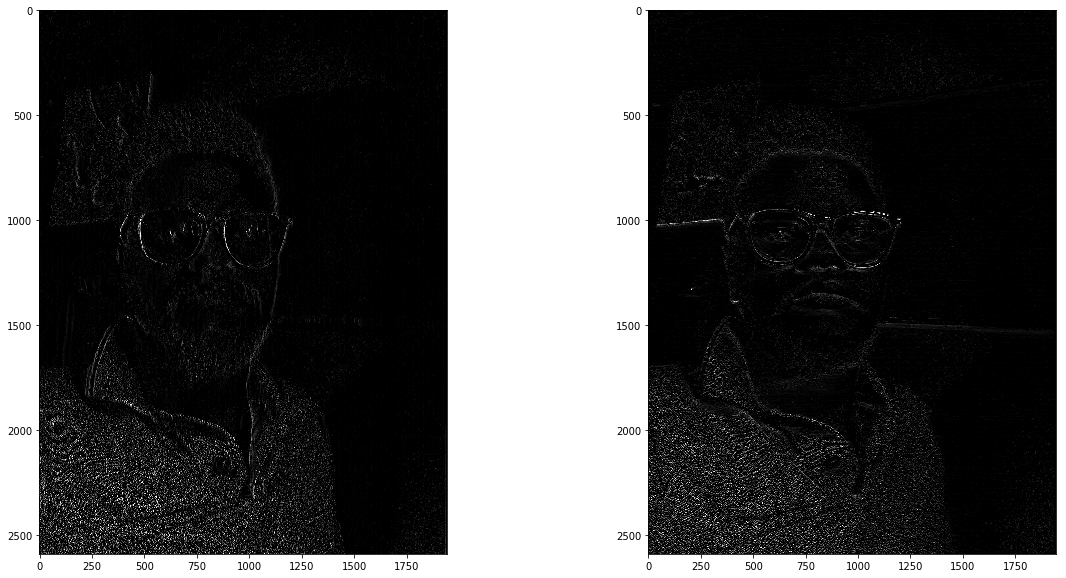

In [27]:
me = mpimg.imread('images/IMAG0024.jpg')
me_gray = cv2.cvtColor(me, cv2.COLOR_RGB2GRAY)
x_filtered_image=cv2.filter2D(me_gray , -1 ,so
                              bel_x)
y_filtered_image=cv2.filter2D(me_gray , -1 ,sobel_y)
f, (ax1 ,ax2) = plt.subplots(1,2,figsize=(20,10))
ax1.imshow(x_filtered_image , cmap='gray')
ax2.imshow(y_filtered_image , cmap='gray')

# التضبيب الغاوسي

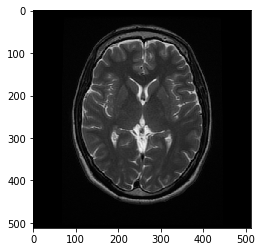

In [29]:
# قراءة الصورة

image = cv2.imread('images/brain_MR.jpg')

image_copy = np.copy(image)

image_copy= cv2.cvtColor(image_copy , cv2.COLOR_BGR2RGB ) 

plt.imshow(image_copy)

تنفيذ التضبيب الغاوسي

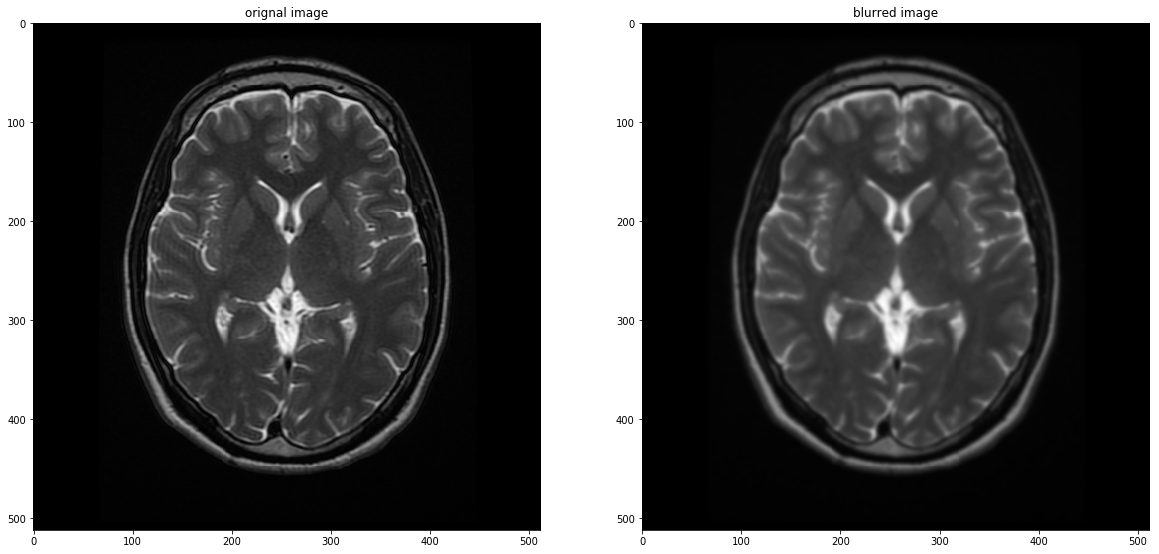

In [32]:
# التحويل إلى اللون الرمادي 

gray = cv2.cvtColor(image_copy , cv2.COLOR_RGB2GRAY)

# تطبيق التضبيب الغاوسي 

gray_blur = cv2.GaussianBlur(gray , (9,9) , 0 )

# عرض الصورة 

f , ( ax1 , ax2)= plt.subplots( 1,2 ,figsize=(20 ,10))

ax1.set_title('orignal image')
ax1.imshow(gray , cmap='gray')
ax2.set_title('blurred image')
ax2.imshow(gray_blur , cmap='gray')

# إختبار أداء المرشح عالي التردد

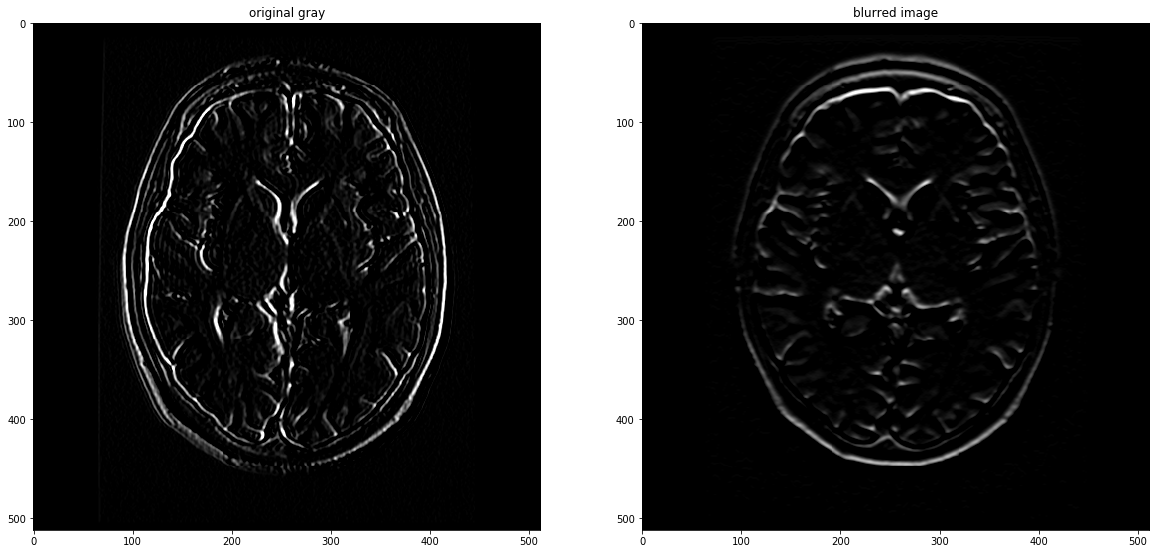

In [34]:
# كاشف سوبل 

sobel_x = np.array([[ -1, 0, 1], 
                   [ -2, 0, 2], 
                   [ -1, 0, 1]])


sobel_y = np.array([[ -1, -2, -1], 
                   [ 0, 0, 0], 
                   [ 1, 2, 1]])

# تطبيق المرشح على كلا الصورتين الأصلية و المضببه

filtererd = cv2.filter2D(gray , -1 ,sobel_x)

filtered_blurred = cv2.filter2D(gray_blur , -1 , sobel_y)

# عرض الصورة 
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

ax1.set_title('original gray')
ax1.imshow(filtererd, cmap='gray')

ax2.set_title('blurred image')
ax2.imshow(filtered_blurred, cmap='gray')


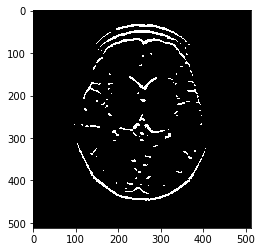

In [35]:
# إنشاء مغاومة  لترشيح كل النقاط الضوئية إلى الأبيض 
# فوق مدى معين 

retval , binary_image = cv2.threshold(filtered_blurred , 50 ,255 , cv2.THRESH_BINARY)

plt.imshow(binary_image , cmap='gray')

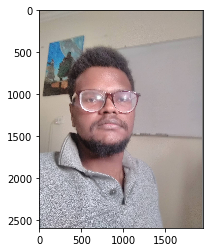

In [36]:
image= cv2.imread('images/IMAG0024.jpg')
image_copy = np.copy(image)
image_copy = cv2.cvtColor(image_copy,cv2.COLOR_BGR2RGB)
plt.imshow(image_copy)


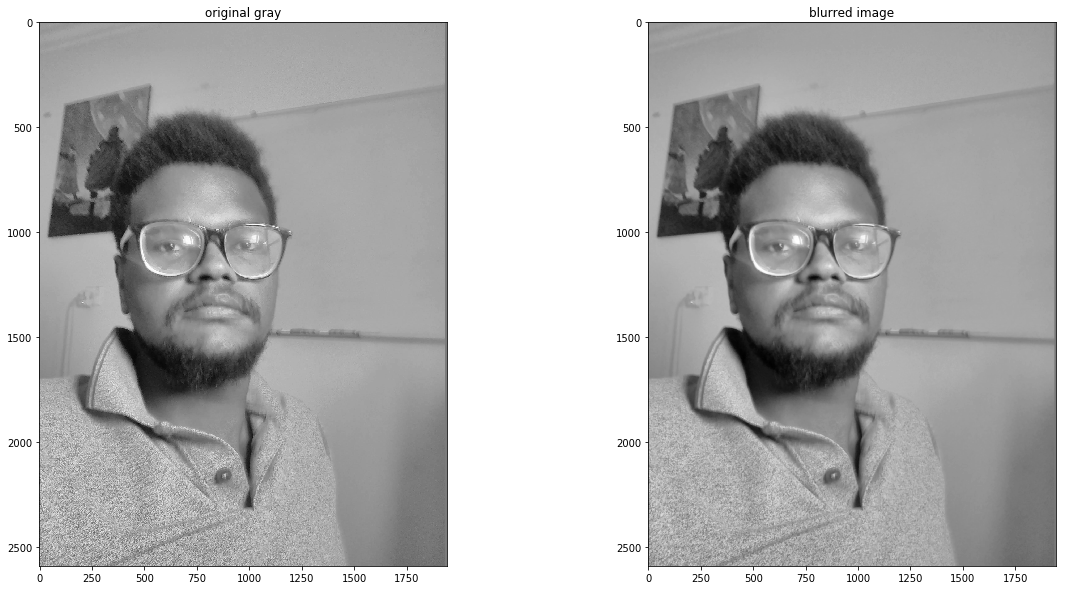

In [42]:
gray = cv2.cvtColor(image_copy , cv2.COLOR_RGB2GRAY)
gray_blur = cv2.GaussianBlur(gray , (9,9),0)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

ax1.set_title('original gray')
ax1.imshow(gray, cmap='gray')

ax2.set_title('blurred image')
ax2.imshow(gray_blur, cmap='gray')

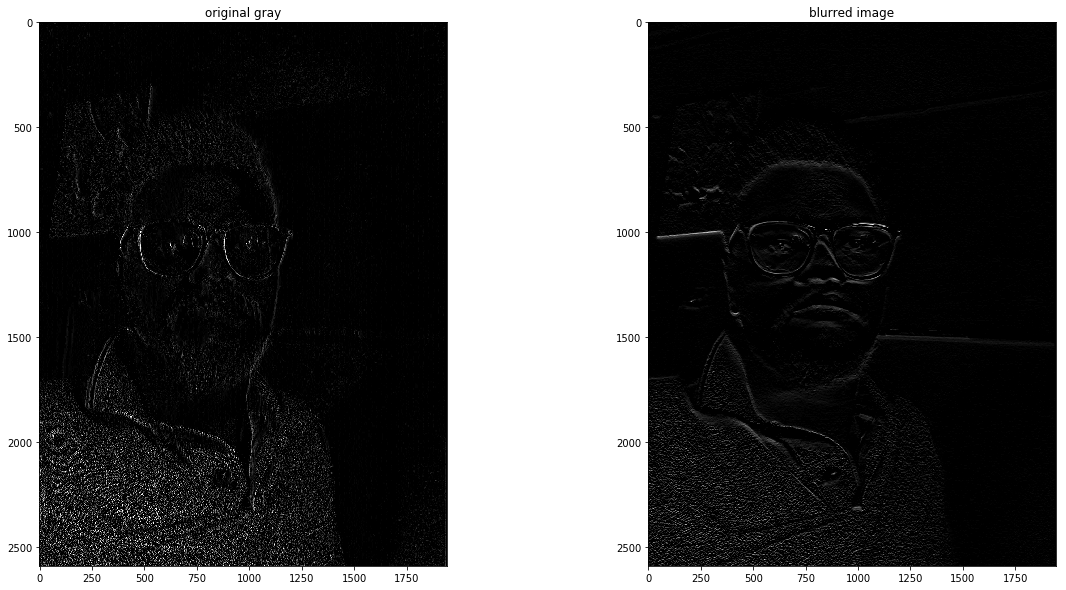

In [46]:
filttered = cv2.filter2D(gray , -1 , sobel_x)
filttered_blurred = cv2.filter2D(gray_blur , -1 , sobel_y)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

ax1.set_title('original gray')
ax1.imshow(filttered, cmap='gray')

ax2.set_title('blurred image')
ax2.imshow(filttered_blurred, cmap='gray')

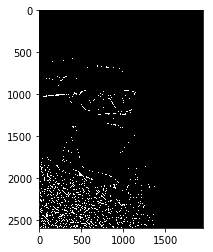

In [53]:
retval , binary_image = cv2.threshold(filttered_blurred , 30 ,255 , cv2.THRESH_BINARY)
plt.imshow(binary_image , cmap='gray')

#  الفترات عالية التردد و منخفضة التردد 

حتى نحدد ما الفرق بين التردد العالي كمرشح سوبل و التردد المنخفض كمرشح غاوسي ، يمكننا إستخدام تحويل فورير 

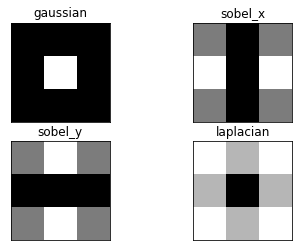

In [57]:
# تعريف مرشح غاوسي و سوبل و لابلاس

gaussian = (1/9)*np.array([[1, 1, 1],
                           [1, 1, 1],
                           [1, 1, 1]])

sobel_x= np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])

sobel_y= np.array([[-1,-2,-1],
                   [0, 0, 0],
                   [1, 2, 1]])

laplacian=np.array([[0, 1, 0],
                    [1,-4, 1],
                    [0, 1, 0]])

filters = [gaussian , sobel_x , sobel_y , laplacian]
filter_name = ['gaussian' , 'sobel_x' , 'sobel_y' , 'laplacian']

#  تنفيذ تحويل فوريور على كل مرشح
# ثم إنشاء صورة محولة ترددياً 

f_filters = [np.fft.fft2(x) for x in filters]
fshift = [ np.fft.fftshift(y) for y in f_filters]
frequency_tx = [ np.log(np.abs(z)+1) for z in fshift]

# إظهار المرشحات الأربعة
for i  in range(len(filters)):
    plt.subplot(2,2,i+1)
    plt.imshow(frequency_tx[i],cmap='gray')
    plt.title(filter_name[i])
    plt.xticks([])
    plt.yticks([])

plt.show()

# كاشف كاني

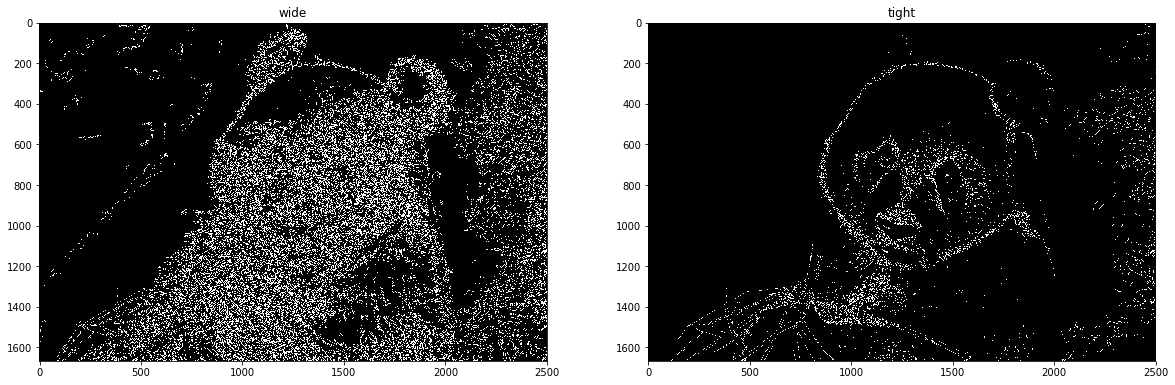

In [177]:
image  = cv2.imread('images/brain_MR.jpg')
image = cv2.cvtColor(image , cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image , cv2.COLOR_RGB2GRAY)

# نسنخدم كاشف كاني 

wide = cv2.Canny(gray , 20 ,100)
tight = cv2.Canny( gray , 200 , 240)

#  عرض الصورة

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

ax1.set_title('wide')
ax1.imshow(wide, cmap='gray')

ax2.set_title('tight')
ax2.imshow(tight, cmap='gray')

# خطوط هوف

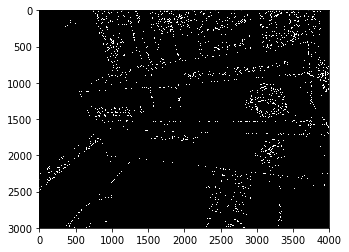

In [135]:
image = cv2.imread('images/cartoon.jpg')
image = cv2.cvtColor(image , cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image , cv2.COLOR_RGB2GRAY)

# تعريف عوامل كاشف كاني

lower_threshold = 30
high_threshold = 70
edges = cv2.Canny(gray , lower_threshold , high_threshold)

plt.imshow(edges, cmap='gray')

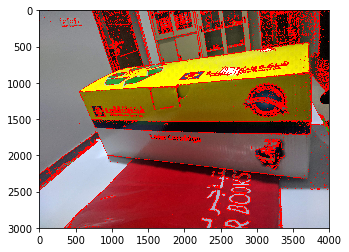

In [137]:
# إيجاد الخطوط بإستخدام تحويل هوف
# تعريق عوامل تحويل هوف
rho = 1
theta = np.pi/180
threshold = 50
min_line_length = 0 
max_line_gap = 3

# إنشاء نسخة من الصور لرسم الخطوط عليها
line_image = np.copy(image)

# إستخدام هوف على الصورة المكتشف حدودها

lines = cv2.HoughLinesP(edges , rho , theta , threshold ,
                        np.array([]) , min_line_length , max_line_gap)

# رسم الخطوط فوق الصورة المنسخة

for line in lines : 
    for x1 , y1 , x2 ,y2 in line:
        cv2.line(line_image , (x1,y1),(x2,y2),(255,0,0),5)
plt.imshow(line_image)

# إكتشاف الوجه بأستخدام خوارزميات هار

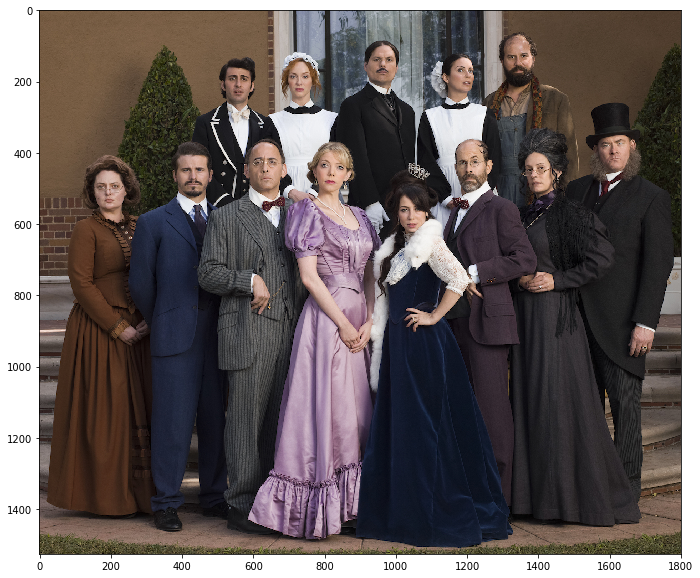

In [167]:
image = cv2.imread('images/multi_faces.jpg')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20,10))
plt.imshow(image)

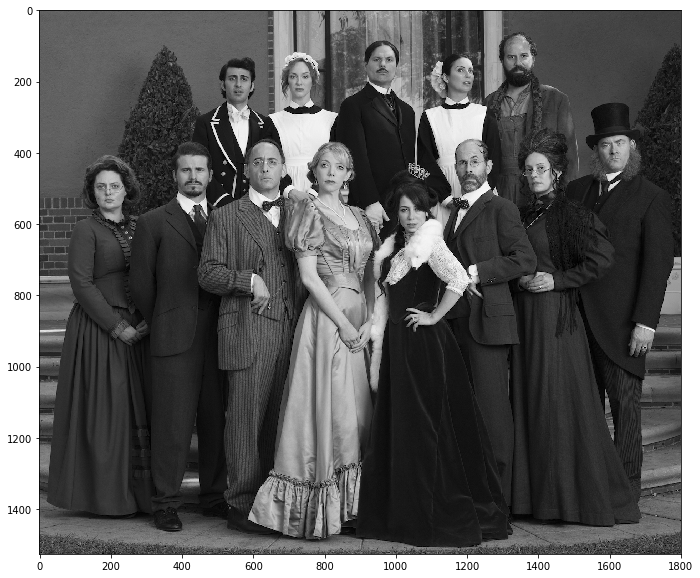

In [168]:
gray = cv2.cvtColor(image , cv2.COLOR_RGB2GRAY)
plt.figure(figsize=(20,10))
plt.imshow(gray, cmap='gray')

In [169]:
face_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_frontalface_default.xml')

face= face_cascade.detectMultiScale(gray,4,6)

مخرج المصنف هو مجموعة مصفوفات تحتوي إحداثيات لأبعاد صناديق المحيطة بكل وجه  ، مع العلم أن كل صندوق أبعاده مربع

In [170]:
# طباعة الأوجه المكتشفه المكتشفة 
print ('We found' + str(len(face)) + 'faces in this images')
print ("thier coordinates and lengths/width are as follows")
print ("====================")
print (face)

We found13faces in this images
thier coordinates and lengths/width are as follows
[[ 917  103   96   96]
 [ 147  459   96   96]
 [1565  339   96   96]
 [1146  132   96   96]
 [ 684  150   96   96]
 [ 510  156   96   96]
 [1295   94   96   96]
 [ 588  390   96   96]
 [1157  390   96   96]
 [ 996  526   96   96]
 [ 383  413   96   96]
 [ 773  404   96   96]
 [1344  411   96   96]]


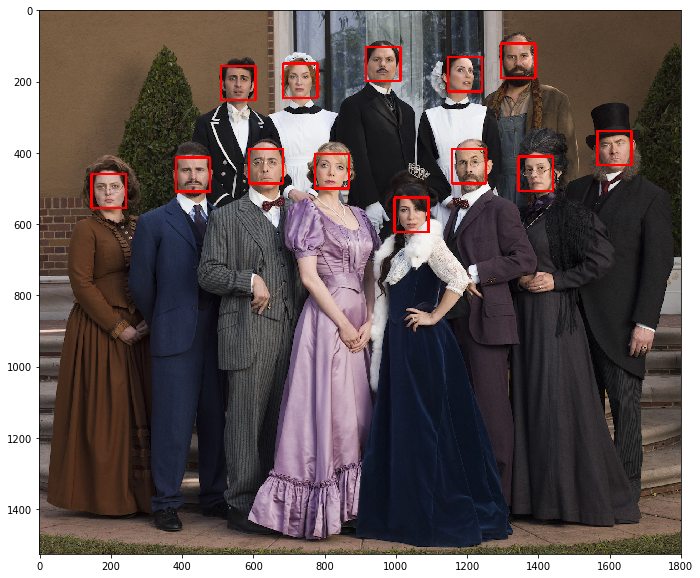

In [171]:
# نسخ الصورة الأصلية لطباعة صناديق الوجه عليها 

img_with_detections = np.copy(image)

for (x , y, w , h) in face:
    #  العنصر الرابع  (255,0,0) يحدد لون المربع
    # العنصر الأخير يحدد سمك المربع 
    cv2.rectangle(img_with_detections,(x,y),(x+w,y+h),(255,0,0),5)

# إظهار الصورة 

plt.figure(figsize=(20,10))
plt.imshow(img_with_detections)